# Computer Vision with Machine Learning

Machine Learning is the science of making the computers learn without being explicitly programmed. Computers or programs learn something from experience and then they perform that task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import cv2 as cv
import os

### Image Classifier for Binary Images

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
X = digits.images

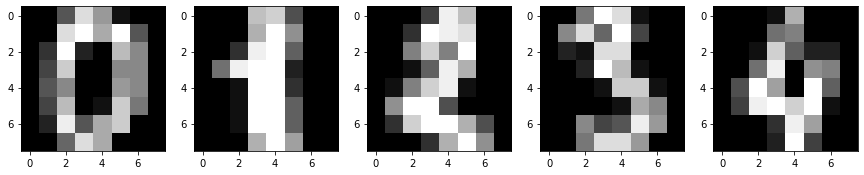

In [5]:
plt.figure(figsize=(15,8))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], cmap="gray")

Putting the features and labels in their appropriate variables. Normally `X` is used for features and `y` is used for labels.

In [6]:
X = digits.data
y = digits.target

In [7]:
df = pd.DataFrame(data=X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In order to test the model, general practice is to split the current data into training and test datasets. Training dataset is used for training the model and test dataset is then used to test the predictions.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Sklearn contains almost all the machine learning algorithms to train the model and then predict.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

First thing is to train the model, so that model can look into the features and learn about the labels accordingly.

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Once the model has learned enough about the data, it is time to predict from that model.

In [11]:
predictions = knn.predict(X_test)

We can check the accuracy of the model using several methods. One of them is checking the accuracy_score

In [12]:
accuracy = accuracy_score(y_test, predictions)

In [13]:
print(accuracy)

0.98


The above model appears to be highly accurate. It is expected to predict correctly 98 times out of 100. 98% accuracy.

### Colored Image Classifier

Lets now try and develop a model that can classify colored images as well. For this purpose several `cat` and `dog` images are used. Each image is labelled cat or dog.

In [14]:
imagePath = './cat_dog_images/'
names = os.listdir(imagePath)
labels = []
for name in names:
    labels.append(name.split(".")[0])

Machine Learning algorithms understand only numbers, so first step would be to convert images into vectors of numbers. Since images can be of different sizes, its a good idea to resize them all to the same size and then generate a one dimensional array.

In [15]:
def convert_to_vector(image):
    size = (32, 32)
    return cv.resize(image, size).flatten()

Testing on one of the images

In [16]:
sample_image = cv.imread("./cat_dog_images/cat.1.jpg")
converted_image = convert_to_vector(sample_image)
print(converted_image)

[41 37 33 ... 31 36 51]


Besides classifying images using their names, it is sometimes a good idea to classify images using their features and other properties like histograms. The function below would calculate the histogram of HSV.

In [17]:
def extract_histogram(image):
    bins = (8, 8, 8)
    hist = cv.calcHist([image], [0, 1, 2], None, bins, [0,256, 0, 256, 0,256])
    cv.normalize(hist, hist)
    return hist.flatten()

Testing on one of the images

In [18]:
hist = extract_histogram(sample_image)
print(hist.shape)

(512,)


Time now to convert all the images to vectors and their histograms to vectors as well.

In [19]:
image_vectors = []
image_hist = []
labels = []

imagePath = './cat_dog_images/'
names = os.listdir(imagePath)

for name in names:
    image_name = os.path.join(imagePath, name)
    print(image_name)
    image = cv.imread(image_name)
    image_vector = convert_to_vector(image)
    hist = extract_histogram(image)
    
    image_vectors.append(image_vector)
    image_hist.append(hist)
    labels.append(name.split(".")[0])

./cat_dog_images/cat.0.jpg
./cat_dog_images/cat.1.jpg
./cat_dog_images/cat.10.jpg
./cat_dog_images/cat.100.jpg
./cat_dog_images/cat.1000.jpg
./cat_dog_images/cat.101.jpg
./cat_dog_images/cat.102.jpg
./cat_dog_images/cat.103.jpg
./cat_dog_images/cat.104.jpg
./cat_dog_images/cat.105.jpg
./cat_dog_images/cat.106.jpg
./cat_dog_images/cat.107.jpg
./cat_dog_images/cat.108.jpg
./cat_dog_images/cat.109.jpg
./cat_dog_images/cat.11.jpg
./cat_dog_images/cat.110.jpg
./cat_dog_images/cat.111.jpg
./cat_dog_images/cat.112.jpg
./cat_dog_images/cat.113.jpg
./cat_dog_images/cat.114.jpg
./cat_dog_images/cat.115.jpg
./cat_dog_images/cat.116.jpg
./cat_dog_images/cat.117.jpg
./cat_dog_images/cat.118.jpg
./cat_dog_images/cat.119.jpg
./cat_dog_images/cat.12.jpg
./cat_dog_images/cat.120.jpg
./cat_dog_images/cat.121.jpg
./cat_dog_images/cat.122.jpg
./cat_dog_images/cat.123.jpg
./cat_dog_images/cat.124.jpg
./cat_dog_images/cat.125.jpg
./cat_dog_images/cat.126.jpg
./cat_dog_images/cat.127.jpg
./cat_dog_images/cat

./cat_dog_images/cat.366.jpg
./cat_dog_images/cat.367.jpg
./cat_dog_images/cat.368.jpg
./cat_dog_images/cat.369.jpg
./cat_dog_images/cat.37.jpg
./cat_dog_images/cat.370.jpg
./cat_dog_images/cat.371.jpg
./cat_dog_images/cat.372.jpg
./cat_dog_images/cat.373.jpg
./cat_dog_images/cat.374.jpg
./cat_dog_images/cat.375.jpg
./cat_dog_images/cat.376.jpg
./cat_dog_images/cat.377.jpg
./cat_dog_images/cat.378.jpg
./cat_dog_images/cat.379.jpg
./cat_dog_images/cat.38.jpg
./cat_dog_images/cat.380.jpg
./cat_dog_images/cat.381.jpg
./cat_dog_images/cat.382.jpg
./cat_dog_images/cat.383.jpg
./cat_dog_images/cat.384.jpg
./cat_dog_images/cat.385.jpg
./cat_dog_images/cat.386.jpg
./cat_dog_images/cat.387.jpg
./cat_dog_images/cat.388.jpg
./cat_dog_images/cat.389.jpg
./cat_dog_images/cat.39.jpg
./cat_dog_images/cat.390.jpg
./cat_dog_images/cat.391.jpg
./cat_dog_images/cat.392.jpg
./cat_dog_images/cat.393.jpg
./cat_dog_images/cat.394.jpg
./cat_dog_images/cat.395.jpg
./cat_dog_images/cat.396.jpg
./cat_dog_images/

./cat_dog_images/cat.626.jpg
./cat_dog_images/cat.627.jpg
./cat_dog_images/cat.628.jpg
./cat_dog_images/cat.629.jpg
./cat_dog_images/cat.63.jpg
./cat_dog_images/cat.630.jpg
./cat_dog_images/cat.631.jpg
./cat_dog_images/cat.632.jpg
./cat_dog_images/cat.633.jpg
./cat_dog_images/cat.634.jpg
./cat_dog_images/cat.635.jpg
./cat_dog_images/cat.636.jpg
./cat_dog_images/cat.637.jpg
./cat_dog_images/cat.638.jpg
./cat_dog_images/cat.639.jpg
./cat_dog_images/cat.64.jpg
./cat_dog_images/cat.640.jpg
./cat_dog_images/cat.641.jpg
./cat_dog_images/cat.642.jpg
./cat_dog_images/cat.643.jpg
./cat_dog_images/cat.644.jpg
./cat_dog_images/cat.645.jpg
./cat_dog_images/cat.646.jpg
./cat_dog_images/cat.647.jpg
./cat_dog_images/cat.648.jpg
./cat_dog_images/cat.649.jpg
./cat_dog_images/cat.65.jpg
./cat_dog_images/cat.650.jpg
./cat_dog_images/cat.651.jpg
./cat_dog_images/cat.652.jpg
./cat_dog_images/cat.653.jpg
./cat_dog_images/cat.654.jpg
./cat_dog_images/cat.655.jpg
./cat_dog_images/cat.656.jpg
./cat_dog_images/

./cat_dog_images/cat.899.jpg
./cat_dog_images/cat.9.jpg
./cat_dog_images/cat.90.jpg
./cat_dog_images/cat.900.jpg
./cat_dog_images/cat.901.jpg
./cat_dog_images/cat.902.jpg
./cat_dog_images/cat.903.jpg
./cat_dog_images/cat.904.jpg
./cat_dog_images/cat.905.jpg
./cat_dog_images/cat.906.jpg
./cat_dog_images/cat.907.jpg
./cat_dog_images/cat.908.jpg
./cat_dog_images/cat.909.jpg
./cat_dog_images/cat.91.jpg
./cat_dog_images/cat.910.jpg
./cat_dog_images/cat.911.jpg
./cat_dog_images/cat.912.jpg
./cat_dog_images/cat.913.jpg
./cat_dog_images/cat.914.jpg
./cat_dog_images/cat.915.jpg
./cat_dog_images/cat.916.jpg
./cat_dog_images/cat.917.jpg
./cat_dog_images/cat.918.jpg
./cat_dog_images/cat.919.jpg
./cat_dog_images/cat.92.jpg
./cat_dog_images/cat.920.jpg
./cat_dog_images/cat.921.jpg
./cat_dog_images/cat.922.jpg
./cat_dog_images/cat.923.jpg
./cat_dog_images/cat.924.jpg
./cat_dog_images/cat.925.jpg
./cat_dog_images/cat.926.jpg
./cat_dog_images/cat.927.jpg
./cat_dog_images/cat.928.jpg
./cat_dog_images/ca

./cat_dog_images/dog.275.jpg
./cat_dog_images/dog.276.jpg
./cat_dog_images/dog.277.jpg
./cat_dog_images/dog.278.jpg
./cat_dog_images/dog.279.jpg
./cat_dog_images/dog.28.jpg
./cat_dog_images/dog.280.jpg
./cat_dog_images/dog.281.jpg
./cat_dog_images/dog.282.jpg
./cat_dog_images/dog.283.jpg
./cat_dog_images/dog.284.jpg
./cat_dog_images/dog.285.jpg
./cat_dog_images/dog.286.jpg
./cat_dog_images/dog.287.jpg
./cat_dog_images/dog.288.jpg
./cat_dog_images/dog.289.jpg
./cat_dog_images/dog.29.jpg
./cat_dog_images/dog.290.jpg
./cat_dog_images/dog.291.jpg
./cat_dog_images/dog.292.jpg
./cat_dog_images/dog.293.jpg
./cat_dog_images/dog.294.jpg
./cat_dog_images/dog.295.jpg
./cat_dog_images/dog.296.jpg
./cat_dog_images/dog.297.jpg
./cat_dog_images/dog.298.jpg
./cat_dog_images/dog.299.jpg
./cat_dog_images/dog.3.jpg
./cat_dog_images/dog.30.jpg
./cat_dog_images/dog.300.jpg
./cat_dog_images/dog.301.jpg
./cat_dog_images/dog.302.jpg
./cat_dog_images/dog.303.jpg
./cat_dog_images/dog.304.jpg
./cat_dog_images/do

./cat_dog_images/dog.56.jpg
./cat_dog_images/dog.560.jpg
./cat_dog_images/dog.561.jpg
./cat_dog_images/dog.562.jpg
./cat_dog_images/dog.563.jpg
./cat_dog_images/dog.564.jpg
./cat_dog_images/dog.565.jpg
./cat_dog_images/dog.566.jpg
./cat_dog_images/dog.567.jpg
./cat_dog_images/dog.568.jpg
./cat_dog_images/dog.569.jpg
./cat_dog_images/dog.57.jpg
./cat_dog_images/dog.570.jpg
./cat_dog_images/dog.571.jpg
./cat_dog_images/dog.572.jpg
./cat_dog_images/dog.573.jpg
./cat_dog_images/dog.574.jpg
./cat_dog_images/dog.575.jpg
./cat_dog_images/dog.576.jpg
./cat_dog_images/dog.577.jpg
./cat_dog_images/dog.578.jpg
./cat_dog_images/dog.579.jpg
./cat_dog_images/dog.58.jpg
./cat_dog_images/dog.580.jpg
./cat_dog_images/dog.581.jpg
./cat_dog_images/dog.582.jpg
./cat_dog_images/dog.583.jpg
./cat_dog_images/dog.584.jpg
./cat_dog_images/dog.585.jpg
./cat_dog_images/dog.586.jpg
./cat_dog_images/dog.587.jpg
./cat_dog_images/dog.588.jpg
./cat_dog_images/dog.589.jpg
./cat_dog_images/dog.59.jpg
./cat_dog_images/d

./cat_dog_images/dog.84.jpg
./cat_dog_images/dog.840.jpg
./cat_dog_images/dog.841.jpg
./cat_dog_images/dog.842.jpg
./cat_dog_images/dog.843.jpg
./cat_dog_images/dog.844.jpg
./cat_dog_images/dog.845.jpg
./cat_dog_images/dog.846.jpg
./cat_dog_images/dog.847.jpg
./cat_dog_images/dog.848.jpg
./cat_dog_images/dog.849.jpg
./cat_dog_images/dog.85.jpg
./cat_dog_images/dog.850.jpg
./cat_dog_images/dog.851.jpg
./cat_dog_images/dog.852.jpg
./cat_dog_images/dog.853.jpg
./cat_dog_images/dog.854.jpg
./cat_dog_images/dog.855.jpg
./cat_dog_images/dog.856.jpg
./cat_dog_images/dog.857.jpg
./cat_dog_images/dog.858.jpg
./cat_dog_images/dog.859.jpg
./cat_dog_images/dog.86.jpg
./cat_dog_images/dog.860.jpg
./cat_dog_images/dog.861.jpg
./cat_dog_images/dog.862.jpg
./cat_dog_images/dog.863.jpg
./cat_dog_images/dog.864.jpg
./cat_dog_images/dog.865.jpg
./cat_dog_images/dog.866.jpg
./cat_dog_images/dog.867.jpg
./cat_dog_images/dog.868.jpg
./cat_dog_images/dog.869.jpg
./cat_dog_images/dog.87.jpg
./cat_dog_images/d

Performing the train test split to measure the accuracy of the model.

In [20]:
train_X_label, test_X_label, train_y_label, test_y_label = train_test_split(image_vectors, labels, test_size=0.25)

#### KNN Algorithm

Using KNN algorithm to predict and then measure the accuracy. First this would be done using labels.

In [21]:
knn = KNeighborsClassifier()
knn.fit(train_X_label, train_y_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
predictions = knn.predict(test_X_label)

In [23]:
score = accuracy_score(predictions, test_y_label)
print(score*100, "%")

53.093812375249506 %


This time model will be trained using histogram vectors.

In [24]:
train_X_hist, test_X_hist, train_y_hist, test_y_hist = train_test_split(image_hist, labels, test_size=0.25)

In [25]:
knn.fit(train_X_hist, train_y_hist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
predictions_hist = knn.predict(test_X_hist)

In [27]:
score_hist = accuracy_score(predictions_hist, test_y_hist)
print(score_hist*100, "%")

60.67864271457086 %


It is clear that with more feature provided, machine can actually predict much better.

#### Naive Bayes Algorithm

In [28]:
naive_model = GaussianNB()
naive_model.fit(train_X_hist, train_y_hist)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
predictions_hist_NB = naive_model.predict(test_X_hist)
score_hist_NB = accuracy_score(predictions_hist_NB, test_y_hist)
print(score_hist_NB*100, "%")

51.896207584830336 %


#### Support Vector Machine

In [30]:
svm_model = svm.SVC(kernel="linear")
svm_model.fit(train_X_hist, train_y_hist)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
predictions_hist_svm = svm_model.predict(test_X_hist)
score_hist_svm = accuracy_score(predictions_hist_svm, test_y_hist)
print(score_hist_svm*100, "%")

58.88223552894212 %


#### Random Forest Classifier

In [32]:
random_forest = RandomForestClassifier()
random_forest.fit(train_X_hist, train_y_hist)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
predictions_hist_rf = random_forest.predict(test_X_hist)
score_hist_rf = accuracy_score(predictions_hist_rf, test_y_hist)
print(score_hist_rf*100, "%")

63.07385229540918 %
